Project for module 3, CAS Applied Data Science, 2021-03-12, P. Meyer, F. Fürst, P. Hurni University of Bern.

***
# Butterfly Classification
***


### Contents

**[0. Introduction](#intro)**

**[1. Load libraries](#loadlibraries)**     
  
**[2. Load data](#loaddata)**

  * [2.1 Load images (x)](#loadimages)
  * [2.2 Generate labels (y)](#generatelabels)

**[3. Having a quick look at the data](#quicklook)**

**[4. Label encoding and one hot encoding ](#labelencoding)**

**[5. Train-Test-Split](#traintest)**
  
**[6. Building a model](#buildmodel)**

**[7. Data Augmentation](#dataaugmentation)**

**[8. Train the model](#trainmodel)**

**[9. Test trained model on an image from the internet](#test)**

   * [9.1 Loading trained model (weights)](#loadsavedweights)
   * [9.2 Upload image and test the model](#testnewimage)

**[10. Conclusion](#conclusion)**


***

<a name="intro"></a>
# 0. Introduction

<a name="loadlibraries"></a>
# 1. Load libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
# only in a Jupyter Notebook
%matplotlib inline

In [2]:
import os
for dirname, _, filenames in os.walk('./leedsbutterfly/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./leedsbutterfly/.DS_Store
./leedsbutterfly/README.txt
./leedsbutterfly/images/0060050.png
./leedsbutterfly/images/0060087.png
./leedsbutterfly/images/0060093.png
./leedsbutterfly/images/0070055.png
./leedsbutterfly/images/0020104.png
./leedsbutterfly/images/0020110.png
./leedsbutterfly/images/0070069.png
./leedsbutterfly/images/0020138.png
./leedsbutterfly/images/0040155.png
./leedsbutterfly/images/0070096.png
./leedsbutterfly/images/0090162.png
./leedsbutterfly/images/0010004.png
./leedsbutterfly/images/0010010.png
./leedsbutterfly/images/0090176.png
./leedsbutterfly/images/0040141.png
./leedsbutterfly/images/0070082.png
./leedsbutterfly/images/0040169.png
./leedsbutterfly/images/0010038.png
./leedsbutterfly/images/0070121.png
./leedsbutterfly/images/0020070.png
./leedsbutterfly/images/0020064.png
./leedsbutterfly/images/0020058.png
./leedsbutterfly/images/0040035.png
./leedsbutterfly/images/0040009.png
./leedsbutterfly/images/0030061.png
./leedsbutterfly/images/0060118.png
./leedsbu

In [3]:
# help(os.walk)

<a name="loaddata"></a>
# 2. Load data

<a name="loadimages"></a>
## 2.1 Load images (x)

See https://pillow.readthedocs.io/en/stable/reference/Image.html

In [4]:
import glob
from PIL import Image
x = [] # array of all images
for img in glob.glob("./leedsbutterfly/images/*.png"):
    # Load images
    image = Image.open(img)
    # Resize image
    size_image = image.resize((128,128))
    x.append(np.array(size_image))

In [5]:
x = np.array(x)

In [6]:
x.shape

(832, 128, 128, 3)

In [7]:
x[0].shape

(128, 128, 3)

In [8]:
type(x)

numpy.ndarray

In [9]:
# Create variables for later use
image_width = x.shape[1]
image_height = x.shape[2]
image_channels = x.shape[3]
print(f"Image width: {image_width}")
print(f"Image height: {image_height}")
print(f"Image channels: {image_channels}")

Image width: 128
Image height: 128
Image channels: 3


<a name="generatelabels"></a>
## 2.2 Generate labels (y)

In [10]:
categories = []
filenames = os.listdir("./leedsbutterfly/images/")
for filename in filenames:
        category = filename.split(".")[0]
        categories.append(category[0:3])

In [11]:
categories[0:10]

['006', '006', '006', '007', '002', '002', '007', '002', '004', '007']

In [12]:
df = pd.DataFrame({
    'Filename' : filenames,
    'Category' : categories
})
df.head()

,Filename,Category
0,0060050.png,006
1,0060087.png,006
2,0060093.png,006
3,0070055.png,007
4,0020104.png,002


In [13]:
# Get labels from textfiles
dictLabel = {}
labels = os.listdir("./leedsbutterfly/descriptions/")
for label in labels:
    with open('./leedsbutterfly/descriptions/'+label) as t:
        # name = t.read().splitlines()[0] # or [1] for english name
        name = t.readlines()[0].rstrip('\n') 
        label = label.rstrip('.txt')
        dictLabel[label] = name
        
dictLabel

{'003': 'Heliconius erato',
 '002': 'Heliconius charitonius',
 '001': 'Danaus plexippus',
 '005': 'Lycaena phlaeas',
 '004': 'Junonia coenia',
 '010': 'Vanessa cardui',
 '006': 'Nymphalis antiopa',
 '007': 'Papilio cresphontes',
 '009': 'Vanessa atalanta',
 '008': 'Pieris rapae'}

In [14]:
## Other way to get labels from textfiles
#dictLabel = {}
#labels = os.listdir("./leedsbutterfly/descriptions/")
#for label in labels:
#    name = pd.read_fwf('./leedsbutterfly/descriptions/'+label)
#    new_name = name.iloc[0,0]
#    label = label.replace('.txt','')
#    dictLabel[label] = new_name

## Manually add labels
# dictLabel = {'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '010': 'Vanessa_cardui'}

In [15]:
df['Category'] = df['Category'].replace(dictLabel) 
df.head()

,Filename,Category
0,0060050.png,Nymphalis antiopa
1,0060087.png,Nymphalis antiopa
2,0060093.png,Nymphalis antiopa
3,0070055.png,Papilio cresphontes
4,0020104.png,Heliconius charitonius


In [16]:
df['Category'].value_counts()

Nymphalis antiopa         100
Heliconius charitonius     93
Vanessa atalanta           91
Junonia coenia             90
Papilio cresphontes        89
Lycaena phlaeas            88
Vanessa cardui             83
Danaus plexippus           82
Heliconius erato           61
Pieris rapae               55
Name: Category, dtype: int64

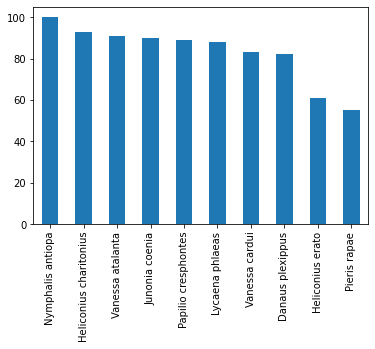

In [17]:
df['Category'].value_counts().plot.bar();

<a name="quicklook"></a>
# 3. Having a quick look at the data

In [18]:
# First array contains the (sorted) unique values
# Second array (returned if return_index is set to True) is a list of the indexes of the first occurrences
l = np.unique(df['Category'], return_index=True)
l

(array(['Danaus plexippus', 'Heliconius charitonius', 'Heliconius erato',
        'Junonia coenia', 'Lycaena phlaeas', 'Nymphalis antiopa',
        'Papilio cresphontes', 'Pieris rapae', 'Vanessa atalanta',
        'Vanessa cardui'], dtype=object),
 array([11,  4, 24,  8, 29,  0,  3, 27, 10, 28]))

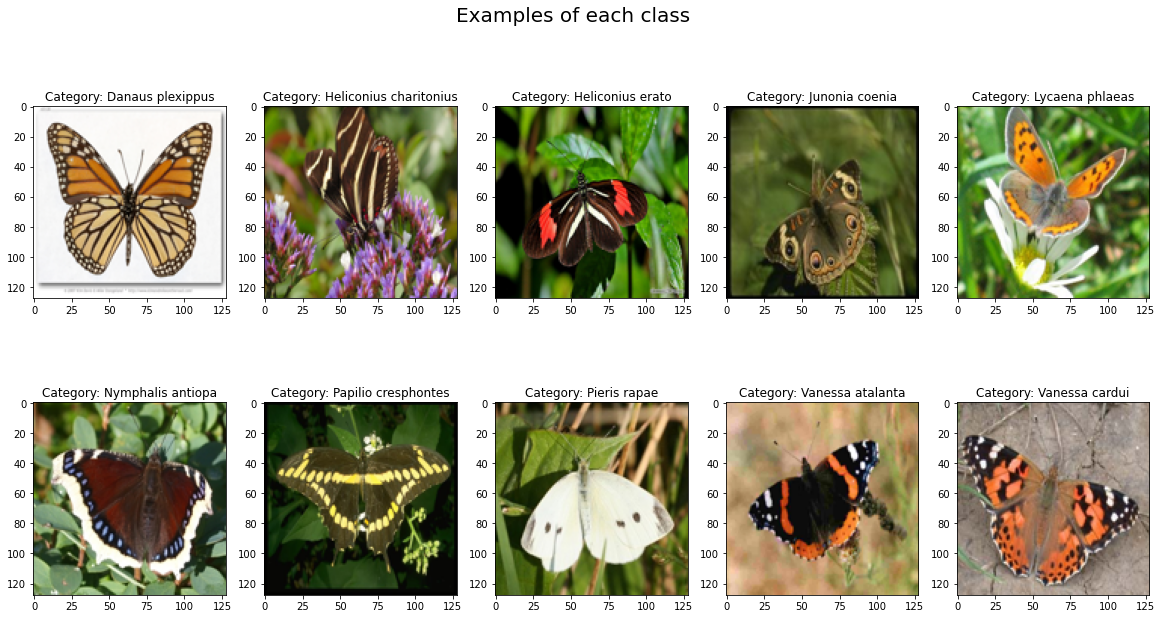

In [19]:
fig, axs = plt.subplots(2, 5, figsize=(20,10))
axs = np.ravel(axs) # returns a 1-D array, containing the elements of the input
for i in range(0,10):
        axs[i].imshow(x[l[1][i]])
        axs[i].set_title(f"Category: {l[0][i]}")
fig.suptitle('Examples of each class', fontsize=20)
plt.show()

<a name="labelencoding"></a>
# 4. Label encoding and one hot encoding 

- https://contactsunny.medium.com/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621
- https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b

In [20]:
# Convert Category strings to label numbers
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Category'] = enc.fit_transform(df['Category'])

In [21]:
enc.classes_

array(['Danaus plexippus', 'Heliconius charitonius', 'Heliconius erato',
       'Junonia coenia', 'Lycaena phlaeas', 'Nymphalis antiopa',
       'Papilio cresphontes', 'Pieris rapae', 'Vanessa atalanta',
       'Vanessa cardui'], dtype=object)

In [22]:
df.head()

,Filename,Category
0,0060050.png,5
1,0060087.png,5
2,0060093.png,5
3,0070055.png,6
4,0020104.png,1


In [23]:
y = df['Category'].values
type(y)

numpy.ndarray

In [24]:
print(f"Unique labels are: {np.unique(y)}")

Unique labels are: [0 1 2 3 4 5 6 7 8 9]


In [25]:
y.shape

(832,)

In [26]:
# One Hot encoding: convert column with label numbers to a sparse matrix 
y = y.reshape(len(y),1)
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() # Option: sparse=False
y = ohe.fit_transform(y)

In [27]:
y.shape

(832, 10)

In [28]:
y[0].shape

(1, 10)

In [29]:
type(y)

scipy.sparse.csr.csr_matrix

In [30]:
# If the type of y is a 'scipy.sparse.csr.csr_matrix', then calling tf.keras.models.Sequential().fit() will raise an error:
# ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'scipy.sparse.csr.csr_matrix'>

# Transform sparse matrix into a (dense) numpy array.
if isinstance(y, scipy.sparse.csr.csr_matrix):
    y = y.toarray()
     
print(f"Type of y is now: {type(y)}")

Type of y is now: <class 'numpy.ndarray'>


In [31]:
x.dtype

dtype('uint8')

In [32]:
y.dtype

dtype('float64')

<a name="traintest"></a>
# 5. Train-Test-Split

Split Dataset, see https://realpython.com/train-test-split-python-data/

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (665, 128, 128, 3)
Shape of x_test: (167, 128, 128, 3)
Shape of y_train: (665, 10)
Shape of y_test: (167, 10)


<a name="buildmodel"></a>
# 6. Building a model

In [35]:
import tensorflow as tf

In [36]:
print(tf.__version__)

2.0.0


In [37]:
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', kernel_initializer='he_normal', bias_initializer='random_uniform', input_shape=(image_width, image_height, image_channels)))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', bias_initializer='random_uniform')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', bias_initializer='random_uniform')) 

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', bias_initializer='random_uniform')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', bias_initializer='random_uniform')) 
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', bias_initializer='random_uniform')) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(64, kernel_initializer='he_normal', activation='relu', use_bias=False))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(10, bias_initializer='random_uniform', activation='softmax'))




model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.005) ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 62, 62, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0

<a name="dataaugmentation"></a>
# 7. Data Augmentation
See
- https://machinelearningmastery.com/image-augmentation-deep-learning-keras/
- https://keras.io/api/preprocessing/image/
- https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c

In [39]:
# Create augmented image generator
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.5,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

# fit parameters from data
datagen.fit(x_train)

In [40]:
# choose image id for plotting
id = 0
x_train[id:id+1].shape, y_train[id:id+1].shape

((1, 128, 128, 3), (1, 10))

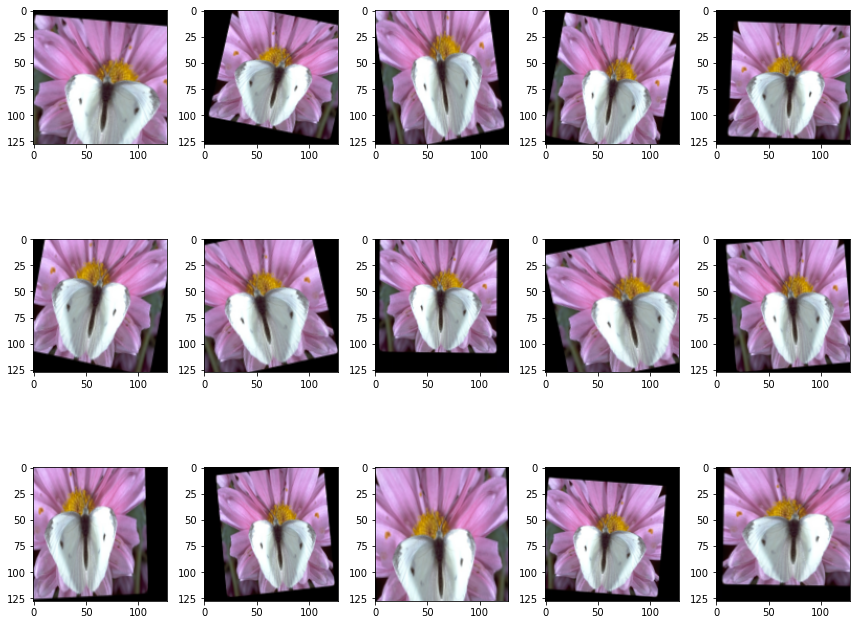

In [41]:
# Plot augmented examples
example_generator = datagen.flow(x_train[id:id+1], y_train[id:id+1])
plt.figure(figsize=(12, 10))
for i in range(0, 15):
    plt.subplot(3, 5, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

<a name="trainmodel"></a>
# 8. Train the model

**Warning**: `model.fit` does NOT reinitialize trainable variables. Every time it continues from the previous state.

In [42]:
## Load weights before continuing training
# model.load_weights('save/butterfly_32.ckpt')

In [43]:
# Save the state of the trainable variables after each epoch.
save_path = 'saved_weights/butterfly_{epoch}.ckpt'
save_callback = tf.keras.callbacks.ModelCheckpoint(filepath=save_path, save_weights_only=True)

How to choose the batch size:
https://stats.stackexchange.com/questions/164876/what-is-the-trade-off-between-batch-size-and-number-of-iterations-to-train-a-neu

In [44]:
epochs = 60
batch_size = 128 #32, 64, 128, 256

# False: train the model with the original data
# True: train the model with the augmented data
aug =  False # True

if aug == True:
    # Fits the model on batches with real-time data augmentation:
    hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size),
                 epochs = epochs,
                 validation_data = (x_test, y_test),
                 callbacks = [save_callback])

else:
    # Fits the model with the original data
    hist = model.fit(x = x_train,
                 y = y_train,
                 epochs = epochs,
                 batch_size = batch_size, 
                 validation_data = (x_test, y_test),
                 callbacks = [save_callback])

Train on 665 samples, validate on 167 samples
Epoch 1/60
665/665 [==============================] - 22s 33ms/sample - loss: 2.5330 - accuracy: 0.1805 - val_loss: 50.6150 - val_accuracy: 0.0659
Epoch 2/60
665/665 [==============================] - 19s 28ms/sample - loss: 2.0022 - accuracy: 0.2887 - val_loss: 32.8136 - val_accuracy: 0.0659
Epoch 3/60
665/665 [==============================] - 18s 28ms/sample - loss: 1.8894 - accuracy: 0.3353 - val_loss: 15.1553 - val_accuracy: 0.1078
Epoch 4/60
665/665 [==============================] - 19s 28ms/sample - loss: 1.8438 - accuracy: 0.3293 - val_loss: 18.4462 - val_accuracy: 0.1856
Epoch 5/60
665/665 [==============================] - 18s 28ms/sample - loss: 1.7173 - accuracy: 0.3925 - val_loss: 15.1226 - val_accuracy: 0.0838
Epoch 6/60
665/665 [==============================] - 18s 28ms/sample - loss: 1.6415 - accuracy: 0.4090 - val_loss: 5.2026 - val_accuracy: 0.1078
Epoch 7/60
665/665 [==============================] - 19s 28ms/sample - l

665/665 [==============================] - 19s 29ms/sample - loss: 0.0170 - accuracy: 0.9970 - val_loss: 0.8999 - val_accuracy: 0.7605
Epoch 57/60
665/665 [==============================] - 18s 27ms/sample - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.8760 - val_accuracy: 0.7545
Epoch 58/60
665/665 [==============================] - 18s 28ms/sample - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.8091 - val_accuracy: 0.7665
Epoch 59/60
665/665 [==============================] - 18s 28ms/sample - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.8358 - val_accuracy: 0.7425
Epoch 60/60
665/665 [==============================] - 19s 28ms/sample - loss: 0.0096 - accuracy: 0.9985 - val_loss: 0.8876 - val_accuracy: 0.7186


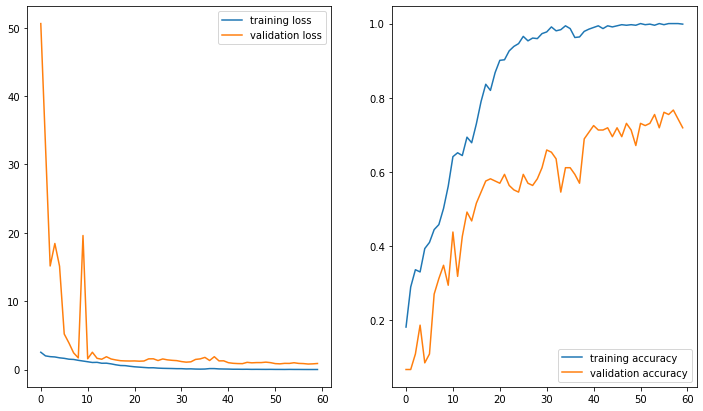

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(12,7))

axs[0].plot(hist.epoch, hist.history['loss'])
axs[0].plot(hist.epoch, hist.history['val_loss'])
axs[0].legend(('training loss', 'validation loss'), loc='upper right')

axs[1].plot(hist.epoch, hist.history['accuracy'])
axs[1].plot(hist.epoch, hist.history['val_accuracy'])
axs[1].legend(('training accuracy', 'validation accuracy'), loc='lower right')

plt.show()

In [46]:
# Compare how the current model performs on the test dataset:
model.evaluate(x_test,  y_test, verbose=2)

167/1 - 2s - loss: 0.5443 - accuracy: 0.7186


[0.8875773631170124, 0.7185629]

## Test trained model on an image from the test set

In [47]:
x_test.shape, x_test[0:1].shape, x_test[0].shape

((167, 128, 128, 3), (1, 128, 128, 3), (128, 128, 3))

In [48]:
y_test.shape

(167, 10)

In [49]:
# A prediction is an array of 10 numbers.
# They represent the model's "confidence" that the image corresponds to each of the 10 different classes of butterflies
y_pred = model.predict(x_test[3:4].astype(float))
y_pred

array([[7.3171213e-07, 2.4618581e-04, 1.6623296e-04, 4.9627086e-08,
        6.1030725e-08, 1.4076741e-05, 9.9956185e-01, 3.8631338e-08,
        1.0245502e-05, 5.0487677e-07]], dtype=float32)

In [50]:
y_pred.ravel()[1]

0.0002461858

Predicted label: 4 (Lycaena phlaeas) with 63.79% confidence
True label: 4 (Lycaena phlaeas)


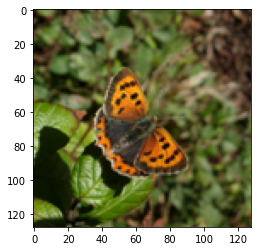

In [74]:
# Test trained model on an image

# Choose some random image id
import random
im_id = random.choice(range(x_test.shape[0]))
# Test trained model on image with id = im_id 
y_pred = model.predict(x_test[im_id:im_id+1].astype(float))
# Print the index of the class with the highest predicted probability
print(f'Predicted label: {np.argmax(y_pred)} ({enc.classes_[np.argmax(y_pred)]}) with {y_pred.ravel()[np.argmax(y_pred)]*100:2.2f}% confidence')
# Print true label
print(f'True label: {np.argmax(y_test[im_id])} ({enc.classes_[np.argmax(y_test[im_id])]})')
plt.imshow(x_test[im_id]);

<a name="test"></a>
# 9. Test trained model on an image from the internet

<a name="loadsavedweights"></a>
## 9.1 Loading trained model (weights)
See https://www.tensorflow.org/tutorials/keras/save_and_load?hl=en

In [52]:
## Save the entire model
#tf.saved_model.save(model, 'saved_model/butterfly_model')
## Reload saved model
#new_model = tf.keras.models.load_model('saved_model/butterfly_model')
## Evaluate the restored model
#loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
#print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

The model weights has been saved during the training process. Load them and re-evaluate the model.

In [59]:
# Load the previously saved weights from the checkpoint
model.load_weights('saved_weights/butterfly_58.ckpt')

# Re-evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

167/1 - 2s - loss: 0.5734 - accuracy: 0.7665
Restored model, accuracy: 76.65%


In [54]:
## Load the weights from the checkpoint and re-evaluate model
#model.load_weights('saved_weights/butterfly_1.ckpt')
#model.evaluate(x_test,  y_test, verbose=2)

#model.load_weights('saved_weights/butterfly_26.ckpt')
#model.evaluate(x_test,  y_test, verbose=2)

#model.load_weights('saved_weights/butterfly_56.ckpt')
#model.evaluate(x_test,  y_test, verbose=2)

<a name="testnewimage"></a>
## 9.2 Upload image and test the model

Downlod these files and check if our model can classify these images correctly as **Danaus plexippus**.
- http://tolweb.org/onlinecontributors/app;jsessionid=ED923944D170E690249D30F799B47562?page=ViewImageData&service=external&sp=15596
- https://de.wikipedia.org/wiki/Monarchfalter#/media/Datei:Danaus_plexippus_001.jpg
- http://nwdistrict.ifas.ufl.edu/nat/files/2019/10/monarch_butterfly03.jpg

In [65]:
# array of all images from the links above
final_test = []
for img in glob.glob("./test_images/Danaus*.jpg"):
    # Load images
    image = Image.open(img)
    # Resize image
    size_image = image.resize((128,128))
    final_test.append(np.array(size_image))

final_test = np.array(final_test)
final_test.shape

(3, 128, 128, 3)

In [66]:
final_test[1:2].shape

(1, 128, 128, 3)

In [68]:
len(final_test)

3

Predicted label: "Danaus plexippus" with 98.06% confidence
The model has classified the image correctly.


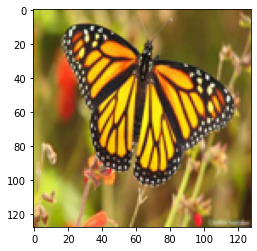

Predicted label: "Danaus plexippus" with 53.59% confidence
The model has classified the image correctly.


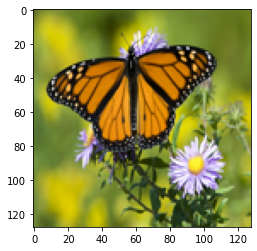

Predicted label: "Danaus plexippus" with 99.95% confidence
The model has classified the image correctly.


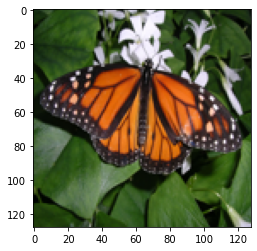

In [75]:
for i in range(len(final_test)):
    # Test trained model on image with id = i
    y_pred = model.predict(final_test[i:i+1].astype(float))
    # Print the index of the class with the highest predicted probability
    print(f'Predicted label: "{enc.classes_[np.argmax(y_pred)]}" with {y_pred.ravel()[np.argmax(y_pred)]*100:2.2f}% confidence')
    if enc.classes_[np.argmax(y_pred)] == 'Danaus plexippus':
        print(f'The model has classified the image correctly.')
    else:
        print(f'The model has misclassified the image.')
    plt.imshow(final_test[i])
    plt.show();

<a name="conclusion"></a>
# 10. Conclusion

- Why does the model do not perform better with data augmentation?
- ...